<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/ML/3_2_Gradient_Boosting_Machine_(GBM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Gradient Boosting Machine (GBM)

## Введение

**Gradient Boosting Machine (GBM)** — это мощный метод машинного обучения, который используется для решения задач регрессии и классификации. Он основан на концепции ансамблевого обучения, в частности, на методах **бустинга**, где модели обучаются последовательно. GBM строит предсказания путем добавления слабых моделей, которые корректируют ошибки предыдущих предсказаний, используя информацию о градиентах функции потерь.

## Основные концепции

### 1. Слабые модели

**Слабые модели** — это простые модели, которые могут предсказывать результаты немного лучше, чем случайные угадания. В контексте GBM чаще всего используются **деревья решений** (обычно с ограниченной глубиной).

### 2. Бустинг

**Бустинг** — это метод, при котором каждое новое дерево обучается на ошибках предыдущих деревьев. Алгоритм на каждом шаге старается минимизировать функцию потерь, опираясь на градиенты, которые показывают направление и величину изменения.

### 3. Градиенты и функции потерь

Градиенты играют ключевую роль в GBM, так как они указывают, как обновить предсказания, чтобы минимизировать ошибки. Функция потерь — это мера качества предсказания модели.

## Алгоритм GBM

Алгоритм GBM можно описать следующим образом:

### Шаг 1: Инициализация

Сначала устанавливаем начальное предсказание. Для задач регрессии обычно используется среднее значение целевой переменной:

$$
F_0(x) = \text{argmin}_\gamma \sum_{i=1}^{n} L(y_i, \gamma)
$$

где $L(y, F(x))$ — функция потерь, отражающая отклонение предсказания от истинного значения.

### Шаг 2: Итеративное добавление моделей

На каждом шаге $m$ алгоритм добавляет новую модель $f_m(x)$ для коррекции ошибок предыдущих предсказаний:

1. **Вычисление градиентов**:
   Градиенты вычисляются по отношению к текущим предсказаниям $F_{m-1}(x)$:

   $$
   g_i = -\frac{\partial L(y_i, F(x_i))}{\partial F(x_i)}
   $$

   Эти градиенты представляют собой псевдо-остатки, которые используются для обучения новой модели.

2. **Обучение слабой модели**:
   Наша новая слабая модель $f_m(x)$ обучается на градиентах:

   $$
   f_m(x) = \text{argmin}_f \sum_{i=1}^{n} (g_i - f(x_i))^2
   $$

3. **Обновление предсказаний**:
   После обучения обновляем общее предсказание:

   $$
   F_m(x) = F_{m-1}(x) + \nu f_m(x)
   $$

   где $\nu$ — скорость обучения (learning rate), которая контролирует величину обновления.

### Шаг 3: Повторение

Эти шаги повторяются, пока не достигнем заданного числа итераций $M$ или пока улучшения не станут незначительными.

## Функции потерь и их градиенты

В зависимости от задачи используются разные функции потерь.

### 1. Регрессия (MSE)

Для задачи регрессии наиболее распространенной функцией потерь является **среднеквадратичная ошибка (MSE)**:

$$
L(y, F(x)) = (y - F(x))^2
$$

**Градиент**:

$$
g_i = -\frac{\partial (y_i - F(x_i))^2}{\partial F(x_i)} = 2(y_i - F(x_i))
$$

### 2. Бинарная классификация (логистическая регрессия)

Для бинарной классификации используется **логистическая функция потерь**:

$$
L(y, F(x)) = -\left[y \log(\sigma(F(x))) + (1 - y) \log(1 - \sigma(F(x)))\right]
$$

где $\sigma(F(x))$ — это сигмоидная функция:

$$
\sigma(F(x)) = \frac{1}{1 + e^{-F(x)}}
$$

**Градиент**:

$$
g_i = \sigma(F(x_i)) - y_i
$$

### 3. Многоклассовая классификация (кросс-энтропия)

Для многоклассовой классификации используется **кросс-энтропия**:

$$
L(y, F(x)) = -\sum_{k=1}^{K} y_{ik} \log(\sigma(F_k(x)))
$$

где $y_{ik}$ — индикаторная переменная для класса $k$.

**Градиент**:

$$
g_{ik} = \sigma(F_k(x_i)) - y_{ik}
$$

## Метрики оценки модели

После обучения модели необходимо оценить ее производительность с помощью различных метрик.

### Для регрессии

1. **Среднеквадратичная ошибка (MSE)**:

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - F(x_i))^2
$$

2. **Средняя абсолютная ошибка (MAE)**:

$$
MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - F(x_i)|
$$

3. **Коэффициент детерминации (R²)**:

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - F(x_i))^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

где $\bar{y}$ — среднее значение целевой переменной.

### Для классификации

1. **Точность (Accuracy)**:

$$
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{n}
$$

где TP — количество истинно положительных, TN — количество истинно отрицательных.

2. **Полнота (Recall)**:

$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

где FN — количество ложно отрицательных.

3. **Точность (Precision)**:

$$
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

где FP — количество ложно положительных.

4. **F1-меры**:

$$
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

5. **ROC-AUC**: Площадь под кривой ROC, показывающая, насколько хорошо модель различает классы.

## Регуляризация

Чтобы предотвратить переобучение, в GBM применяются методы регуляризации:

1. **Ограничение глубины деревьев**: Устанавливает максимальную глубину деревьев для уменьшения их сложности.
2. **Скорость обучения ($\nu$)**: Меньшее значение замедляет процесс обучения, что помогает избежать переобучения.
3. **L2-регуляризация**: Добавление штрафа за большие значения коэффициентов в модели:

$$
L(y, F(x)) = (y - F(x))^2 + \lambda \sum_{k=1}^{K} f_k^2
$$

где $\lambda$ — коэффициент регуляризации.

## Применение GBM

### Подготовка данных

Перед применением GBM необходимо подготовить данные:

1. **Обработка пропущенных значений**: Заполнение или удаление пропущенных значений.
2. **Кодирование категориальных переменных**: Преобразование категориальных признаков в числовые (например, с использованием one-hot encoding).
3. **Масштабирование признаков**: Стандартизация или нормализация числовых признаков.

### Обучение модели

После подготовки данных мы можем обучить модель GBM, выбрав соответствующие параметры и функции потерь в зависимости от задачи. Например, можно использовать библиотеки, такие как `XGBoost`, `LightGBM`, `CatBoost`, которые предлагают высокоэффективные реализации GBM.

### Оценка модели

После обучения модели проводится её оценка на тестовом наборе данных, чтобы проверить, насколько хорошо она работает на невидимых данных. Основные метрики, такие как MSE для регрессии и точность для классификации, помогут определить качество модели.

## Преимущества и недостатки GBM

### Преимущества:

- **Высокая точность**: Часто показывает высокие результаты на задачах регрессии и классификации.
- **Гибкость**: Может быть использован для решения различных задач.
- **Способность к обработке сложных данных**: Эффективен на

 высокоразмерных и сложных данных.

### Недостатки:

- **Переобучение**: Модель может переобучаться при слишком большом количестве деревьев или недостаточной регуляризации.
- **Долгое время обучения**: GBM может быть медленным на больших наборах данных из-за последовательного добавления деревьев.
- **Сложность настройки**: Требует тщательной настройки гиперпараметров для достижения оптимальных результатов.

## Заключение

Gradient Boosting Machine — это мощный инструмент в арсенале методов машинного обучения. Понимание его механики, включая вычисление градиентов, функции потерь и применение регуляризации, позволяет эффективно применять его к различным задачам. Несмотря на свои недостатки, GBM остается популярным выбором для многих практических задач благодаря своей высокой точности и гибкости.

### Пример без кода

Рассмотрим пример с использованием GBM для решения задачи регрессии. Пусть у нас есть данные о ценах на дома с их характеристиками. Начнем с предсказания, равного среднему значению целевой переменной (например, 300,000).

1. **Шаг 1**: Начальное предсказание:

   $$
   F_0(x) = 300,000
   $$

2. **Шаг 2**: Вычисление градиентов для каждого дома:

   | Дом | Истинная цена ($y$) | Предсказанная цена ($F_0(x)$) | Градиент ($g_i$) |
   |-----|------------------|-------------------------|-----------------|
   | 1   | 350,000          | 300,000                 | $g_1 = 2(350,000 - 300,000) = 100,000$ |
   | 2   | 400,000          | 300,000                 | $g_2 = 2(400,000 - 300,000) = 200,000$ |
   | 3   | 500,000          | 300,000                 | $g_3 = 2(500,000 - 300,000) = 400,000$ |

3. **Шаг 3**: Обучение слабой модели (например, дерева решений) на этих градиентах и обновление предсказаний.

Предположим, после обучения мы получили предсказание для дерева, равное 50,000. Скорость обучения ($\nu$) установлена на 0.1.

4. **Шаг 4**: Обновление предсказаний:

   $$
   F_1(x_1) = 300,000 + 0.1 \cdot 50,000 = 305,000
   $$

Эти шаги продолжаются, и мы продолжаем обновлять предсказания, добавляя новые слабые модели, пока не достигнем заданного числа итераций или пока улучшения не станут незначительными.


## Пример задачи классификации с использованием Gradient Boosting Machine (GBM)

Для иллюстрации процесса работы алгоритма GBM в задаче бинарной классификации мы рассмотрим гипотетический набор данных.

### Данные

Предположим, у нас есть набор данных с двумя признаками (A и B) и бинарной целевой переменной (Y), которая может принимать значения 0 или 1.

| Признак A | Признак B | Целевая переменная Y |
|-----------|-----------|-----------------------|
| 2.0       | 3.0       | 0                     |
| 1.0       | 1.5       | 0                     |
| 1.5       | 2.0       | 0                     |
| 3.0       | 4.0       | 1                     |
| 2.5       | 3.5       | 1                     |
| 3.5       | 5.0       | 1                     |

### Шаг 1: Инициализация

На первом шаге мы инициализируем модель, предсказывая, что все наблюдения будут принадлежать к классу, который имеет наибольшее количество экземпляров. В нашем случае, классы распределяются следующим образом:

- Класс 0: 3 наблюдения
- Класс 1: 3 наблюдения

Для простоты предположим, что мы будем предсказывать вероятность принадлежности к классу 1. Начальное предсказание (вероятность) можно установить на уровне:

$$
F_0(x) = \frac{3}{6} = 0.5
$$

### Шаг 2: Вычисление функции потерь и градиентов

Теперь нам необходимо вычислить градиенты. Используем логистическую функцию потерь для задачи бинарной классификации:

$$
L(y, F(x)) = -\left[y \log(\sigma(F(x))) + (1 - y) \log(1 - \sigma(F(x)))\right]
$$

где $\sigma(F(x))$ — это сигмоидная функция:

$$
\sigma(F(x)) = \frac{1}{1 + e^{-F(x)}}
$$

**Градиент** вычисляется следующим образом:

$$
g_i = \sigma(F(x_i)) - y_i
$$

Теперь вычислим градиенты для каждого наблюдения:

- Для первого наблюдения ($i=1$):
  $$
  g_1 = \sigma(0.5) - 0 = \frac{1}{1 + e^{-0.5}} - 0 \approx 0.622 - 0 = 0.622
  $$
  
- Для второго наблюдения ($i=2$):
  $$
  g_2 = \sigma(0.5) - 0 \approx 0.622 - 0 = 0.622
  $$

- Для третьего наблюдения ($i=3$):
  $$
  g_3 = \sigma(0.5) - 0 \approx 0.622 - 0 = 0.622
  $$

- Для четвертого наблюдения ($i=4$):
  $$
  g_4 = \sigma(0.5) - 1 \approx 0.622 - 1 = -0.378
  $$

- Для пятого наблюдения ($i=5$):
  $$
  g_5 = \sigma(0.5) - 1 \approx 0.622 - 1 = -0.378
  $$

- Для шестого наблюдения ($i=6$):
  $$
  g_6 = \sigma(0.5) - 1 \approx 0.622 - 1 = -0.378
  $$

Итак, градиенты для каждого наблюдения будут:

| Наблюдение | $Y$ | $F_0(x)$ | $g_i$         |
|-------------|-------|------------|------------------|
| 1           | 0     | 0.5        | 0.622            |
| 2           | 0     | 0.5        | 0.622            |
| 3           | 0     | 0.5        | 0.622            |
| 4           | 1     | 0.5        | -0.378           |
| 5           | 1     | 0.5        | -0.378           |
| 6           | 1     | 0.5        | -0.378           |

### Шаг 3: Обучение слабой модели

Теперь мы обучим слабую модель (например, дерево решений) на основе полученных градиентов. Предположим, что наша модель предсказывает значения на основе входных данных (A и B) и градиентов. Пусть предсказания для нового дерева будут следующими:

| Признак A | Признак B | Предсказание дерева $f_1(x)$ |
|-----------|-----------|----------------------------------|
| 2.0       | 3.0       | -0.5                             |
| 1.0       | 1.5       | -0.4                             |
| 1.5       | 2.0       | -0.3                             |
| 3.0       | 4.0       | 0.4                              |
| 2.5       | 3.5       | 0.3                              |
| 3.5       | 5.0       | 0.5                              |

### Шаг 4: Обновление предсказаний

Теперь обновим предсказания, используя скорость обучения ($\nu = 0.1$):

$$
F_1(x) = F_0(x) + \nu f_1(x)
$$

Таким образом, обновляем предсказания для каждого наблюдения:

- Для первого наблюдения:
  $$
  F_1(x_1) = 0.5 + 0.1 \cdot (-0.5) = 0.5 - 0.05 = 0.45
  $$

- Для второго наблюдения:
  $$
  F_1(x_2) = 0.5 + 0.1 \cdot (-0.4) = 0.5 - 0.04 = 0.46
  $$

- Для третьего наблюдения:
  $$
  F_1(x_3) = 0.5 + 0.1 \cdot (-0.3) = 0.5 - 0.03 = 0.47
  $$

- Для четвертого наблюдения:
  $$
  F_1(x_4) = 0.5 + 0.1 \cdot 0.4 = 0.5 + 0.04 = 0.54
  $$

- Для пятого наблюдения:
  $$
  F_1(x_5) = 0.5 + 0.1 \cdot 0.3 = 0.5 + 0.03 = 0.53
  $$

- Для шестого наблюдения:
  $$
  F_1(x_6) = 0.5 + 0.1 \cdot 0.5 = 0.5 + 0.05 = 0.55
  $$

Таким образом, обновленные предсказания:

| Наблюдение | Обновленное предсказание $F_1(x)$ |
|-------------|-------------------------------------|
| 1           | 0.45                                |
| 2           | 0.46                                |
| 3           | 0.47                                |
| 4           | 0.54                                |
| 5           | 0.53                                |
| 6           | 0.55                                |

### Шаг 5: Вычисление новых градиентов

После обновления предсказаний вычисляем новые градиенты для следующего дерева, используя те же формулы.

- Для первого наблюдения ($i=1$):
  $$
  g_1 = \sigma(0.45) - 0 \approx 0.610
  $$

- Для второго наблюдения ($i=2$):
  $$
  g_2 = \sigma(0.46) - 0 \approx 0.613
  $$

- Для третьего наблюдения ($i=3$):
  $$
  g_3 = \sigma(0.47) - 0 \approx 0.615
  $$

- Для четвертого наблюдения ($i=4$):
  $$
  g_4 = \sigma(0.54) - 1 \approx 0.631 - 1 = -0.369
  $$

- Для пятого наблюдения ($i=5$):
  $$
  g_5 = \sigma(0.53) - 1 \approx 0.628 - 1 = -0.372
  $$

- Для шестого наблюдения ($i=6$):
  $$
  g_6 = \sigma(0.55) - 1 \approx 0.634 - 1 = -0.366
  $$

Таким образом, новые градиенты будут:

| Наблюдение

 | $Y$ | $F_1(x)$ | $g_i$         |
|-------------|-------|------------|------------------|
| 1           | 0     | 0.45       | 0.610            |
| 2           | 0     | 0.46       | 0.613            |
| 3           | 0     | 0.47       | 0.615            |
| 4           | 1     | 0.54       | -0.369           |
| 5           | 1     | 0.53       | -0.372           |
| 6           | 1     | 0.55       | -0.366           |

### Шаг 6: Обучение второго дерева

Следующий шаг включает в себя обучение второго дерева на новых градиентах. Допустим, мы обучили второе дерево, и его предсказания (значения) составили:

| Признак A | Признак B | Предсказание дерева $f_2(x)$ |
|-----------|-----------|----------------------------------|
| 2.0       | 3.0       | -0.3                             |
| 1.0       | 1.5       | -0.2                             |
| 1.5       | 2.0       | -0.1                             |
| 3.0       | 4.0       | 0.5                              |
| 2.5       | 3.5       | 0.4                              |
| 3.5       | 5.0       | 0.6                              |

Обновим предсказания, снова используя скорость обучения ($\nu = 0.1$):

- Для первого наблюдения:
  $$
  F_2(x_1) = 0.45 + 0.1 \cdot (-0.3) = 0.45 - 0.03 = 0.42
  $$

- Для второго наблюдения:
  $$
  F_2(x_2) = 0.46 + 0.1 \cdot (-0.2) = 0.46 - 0.02 = 0.44
  $$

- Для третьего наблюдения:
  $$
  F_2(x_3) = 0.47 + 0.1 \cdot (-0.1) = 0.47 - 0.01 = 0.46
  $$

- Для четвертого наблюдения:
  $$
  F_2(x_4) = 0.54 + 0.1 \cdot 0.5 = 0.54 + 0.05 = 0.59
  $$

- Для пятого наблюдения:
  $$
  F_2(x_5) = 0.53 + 0.1 \cdot 0.4 = 0.53 + 0.04 = 0.57
  $$

- Для шестого наблюдения:
  $$
  F_2(x_6) = 0.55 + 0.1 \cdot 0.6 = 0.55 + 0.06 = 0.61
  $$

Обновленные предсказания:

| Наблюдение | Обновленное предсказание $F_2(x)$ |
|-------------|-------------------------------------|
| 1           | 0.42                                |
| 2           | 0.44                                |
| 3           | 0.46                                |
| 4           | 0.59                                |
| 5           | 0.57                                |
| 6           | 0.61                                |

### Шаг 7: Вычисление окончательных предсказаний и классификация

После нескольких итераций (допустим, мы остановились на втором дереве), окончательные предсказания можно получить, используя:

$$
F(x) = F_0(x) + \nu f_1(x) + \nu f_2(x)
$$

### Итоговые предсказания

Чтобы классифицировать наблюдения, мы используем пороговое значение (обычно 0.5). Если $F(x) \geq 0.5$, то мы предсказываем класс 1, иначе — класс 0.

Результаты классификации:

| Наблюдение | Окончательное предсказание $F(x)$ | Класс |
|-------------|-------------------------------------|-------|
| 1           | 0.42                                | 0     |
| 2           | 0.44                                | 0     |
| 3           | 0.46                                | 0     |
| 4           | 0.59                                | 1     |
| 5           | 0.57                                | 1     |
| 6           | 0.61                                | 1     |

### Заключение

Таким образом, мы рассмотрели, как алгоритм Gradient Boosting Machine работает в задаче бинарной классификации, начиная от инициализации, вычисления градиентов, обучения слабых моделей и обновления предсказаний, до финальной классификации. В итоге, мы смогли классифицировать наблюдения в наш набор данных, что продемонстрировало эффективность метода GBM.




## Пример задачи регрессии с использованием Gradient Boosting Machine (GBM)

Чтобы продемонстрировать, как работает алгоритм Gradient Boosting Machine в задаче регрессии, рассмотрим гипотетический набор данных.

### Данные

Предположим, у нас есть набор данных с двумя признаками (A и B) и целевой переменной (Y), которая является непрерывной числовой величиной. Пример данных:

| Признак A | Признак B | Целевая переменная Y |
|-----------|-----------|-----------------------|
| 1.0       | 1.5       | 2.5                   |
| 2.0       | 2.5       | 3.5                   |
| 1.5       | 2.0       | 2.0                   |
| 3.0       | 3.5       | 5.0                   |
| 2.5       | 3.0       | 4.0                   |
| 3.5       | 4.0       | 6.0                   |

### Шаг 1: Инициализация

На первом шаге мы инициализируем модель, предсказывая среднее значение целевой переменной:

$$
F_0(x) = \frac{1}{6}(2.5 + 3.5 + 2.0 + 5.0 + 4.0 + 6.0) = \frac{23.0}{6} \approx 3.83
$$

### Шаг 2: Вычисление функции потерь и градиентов

Теперь нам необходимо вычислить градиенты. Мы будем использовать среднеквадратичную ошибку (MSE) в качестве функции потерь для задачи регрессии:

$$
L(y, F(x)) = \frac{1}{2}(y - F(x))^2
$$

**Градиент** функции потерь по отношению к предсказанию можно вычислить как:

$$
g_i = F(x_i) - y_i
$$

Теперь вычислим градиенты для каждого наблюдения:

- Для первого наблюдения ($i=1$):
  $$
  g_1 = 3.83 - 2.5 \approx 1.33
  $$
  
- Для второго наблюдения ($i=2$):
  $$
  g_2 = 3.83 - 3.5 \approx 0.33
  $$

- Для третьего наблюдения ($i=3$):
  $$
  g_3 = 3.83 - 2.0 \approx 1.83
  $$

- Для четвертого наблюдения ($i=4$):
  $$
  g_4 = 3.83 - 5.0 \approx -1.17
  $$

- Для пятого наблюдения ($i=5$):
  $$
  g_5 = 3.83 - 4.0 \approx -0.17
  $$

- Для шестого наблюдения ($i=6$):
  $$
  g_6 = 3.83 - 6.0 \approx -2.17
  $$

Таким образом, градиенты для каждого наблюдения будут:

| Наблюдение | $Y$ | $F_0(x)$ | $g_i$         |
|-------------|-------|------------|------------------|
| 1           | 2.5   | 3.83       | 1.33             |
| 2           | 3.5   | 3.83       | 0.33             |
| 3           | 2.0   | 3.83       | 1.83             |
| 4           | 5.0   | 3.83       | -1.17            |
| 5           | 4.0   | 3.83       | -0.17            |
| 6           | 6.0   | 3.83       | -2.17            |

### Шаг 3: Обучение слабой модели

Теперь мы обучим слабую модель (например, дерево решений) на основе полученных градиентов. Предположим, что наша модель предсказывает значения на основе входных данных (A и B) и градиентов. Пусть предсказания для нового дерева будут следующими:

| Признак A | Признак B | Предсказание дерева $f_1(x)$ |
|-----------|-----------|----------------------------------|
| 1.0       | 1.5       | 0.5                              |
| 2.0       | 2.5       | 0.3                              |
| 1.5       | 2.0       | 0.6                              |
| 3.0       | 3.5       | 0.7                              |
| 2.5       | 3.0       | 0.8                              |
| 3.5       | 4.0       | 1.0                              |

### Шаг 4: Обновление предсказаний

Теперь обновим предсказания, используя скорость обучения ($\nu = 0.1$):

$$
F_1(x) = F_0(x) + \nu f_1(x)
$$

Таким образом, обновляем предсказания для каждого наблюдения:

- Для первого наблюдения:
  $$
  F_1(x_1) = 3.83 + 0.1 \cdot 0.5 = 3.83 + 0.05 = 3.88
  $$

- Для второго наблюдения:
  $$
  F_1(x_2) = 3.83 + 0.1 \cdot 0.3 = 3.83 + 0.03 = 3.86
  $$

- Для третьего наблюдения:
  $$
  F_1(x_3) = 3.83 + 0.1 \cdot 0.6 = 3.83 + 0.06 = 3.89
  $$

- Для четвертого наблюдения:
  $$
  F_1(x_4) = 3.83 + 0.1 \cdot 0.7 = 3.83 + 0.07 = 3.90
  $$

- Для пятого наблюдения:
  $$
  F_1(x_5) = 3.83 + 0.1 \cdot 0.8 = 3.83 + 0.08 = 3.91
  $$

- Для шестого наблюдения:
  $$
  F_1(x_6) = 3.83 + 0.1 \cdot 1.0 = 3.83 + 0.1 = 3.93
  $$

Таким образом, обновленные предсказания:

| Наблюдение | Обновленное предсказание $F_1(x)$ |
|-------------|-------------------------------------|
| 1           | 3.88                                |
| 2           | 3.86                                |
| 3           | 3.89                                |
| 4           | 3.90                                |
| 5           | 3.91                                |
| 6           | 3.93                                |

### Шаг 5: Вычисление новых градиентов

После обновления предсказаний вычисляем новые градиенты для следующего дерева, используя те же формулы:

$$
g_i = F(x_i) - y_i
$$

Теперь, вычислим новые градиенты:

- Для первого наблюдения ($i=1$):
  $$
  g_1 = 3.88 - 2.5 \approx 1.38
  $$

- Для второго наблюдения ($i=2$):
  $$
  g_2 = 3.86 - 3.5 \approx 0.36
  $$

- Для третьего наблюдения ($i=3$):
  $$
  g_3 = 3.89 - 2.0 \approx 1.89
  $$

- Для четвертого наблюдения ($i=4$):
  $$
  g_4 = 3.90 - 5.0 \approx -1.10
  $$

- Для пятого наблюдения ($i=5$):
  $$
  g_5 = 3.91 - 4.0 \approx -0.09
  $$

- Для шестого наблюдения ($i=6$):
  $$
  g_6 = 3.93 - 6.0 \approx -2.07
  $$

Таким образом, новые градиенты будут:

| Наблюдение | $Y$ | $F_1(x)$ | $g_i$         |
|-------------|-------|------------|------------------|
| 1           | 2.5   | 3.88       | 1.38             |
| 2           | 3.5   | 3.86       | 0.36             |
| 3           | 2.0   | 3.89       | 1.89             |
| 4           | 5.0   | 3.90       | -1.10            |
| 5           | 4.

0   | 3.91       | -0.09            |
| 6           | 6.0   | 3.93       | -2.07            |

### Шаг 6: Обучение второго дерева

Теперь обучим второе дерево на новых градиентах. Предположим, что новое дерево предсказывает следующие значения:

| Признак A | Признак B | Предсказание дерева $f_2(x)$ |
|-----------|-----------|----------------------------------|
| 1.0       | 1.5       | 0.4                              |
| 2.0       | 2.5       | 0.2                              |
| 1.5       | 2.0       | 0.5                              |
| 3.0       | 3.5       | 0.6                              |
| 2.5       | 3.0       | 0.7                              |
| 3.5       | 4.0       | 0.9                              |

### Шаг 7: Обновление предсказаний

Теперь обновим предсказания с помощью второго дерева:

$$
F_2(x) = F_1(x) + \nu f_2(x)
$$

Обновляем предсказания для каждого наблюдения:

- Для первого наблюдения:
  $$
  F_2(x_1) = 3.88 + 0.1 \cdot 0.4 = 3.88 + 0.04 = 3.92
  $$

- Для второго наблюдения:
  $$
  F_2(x_2) = 3.86 + 0.1 \cdot 0.2 = 3.86 + 0.02 = 3.88
  $$

- Для третьего наблюдения:
  $$
  F_2(x_3) = 3.89 + 0.1 \cdot 0.5 = 3.89 + 0.05 = 3.94
  $$

- Для четвертого наблюдения:
  $$
  F_2(x_4) = 3.90 + 0.1 \cdot 0.6 = 3.90 + 0.06 = 3.96
  $$

- Для пятого наблюдения:
  $$
  F_2(x_5) = 3.91 + 0.1 \cdot 0.7 = 3.91 + 0.07 = 3.98
  $$

- Для шестого наблюдения:
  $$
  F_2(x_6) = 3.93 + 0.1 \cdot 0.9 = 3.93 + 0.09 = 4.02
  $$

Обновленные предсказания:

| Наблюдение | Обновленное предсказание $F_2(x)$ |
|-------------|-------------------------------------|
| 1           | 3.92                                |
| 2           | 3.88                                |
| 3           | 3.94                                |
| 4           | 3.96                                |
| 5           | 3.98                                |
| 6           | 4.02                                |

### Шаг 8: Окончательные предсказания

После нескольких итераций (в нашем случае — двух деревьев), окончательные предсказания можно получить, используя:

$$
F(x) = F_0(x) + \nu f_1(x) + \nu f_2(x)
$$

#### Итоговые предсказания

Для классификации результатов задачи регрессии, мы можем просто использовать полученные предсказания как оценки целевой переменной:

| Наблюдение | Окончательное предсказание $F(x)$ |
|-------------|-------------------------------------|
| 1           | 3.92                                |
| 2           | 3.88                                |
| 3           | 3.94                                |
| 4           | 3.96                                |
| 5           | 3.98                                |
| 6           | 4.02                                |

### Заключение

Мы рассмотрели, как алгоритм Gradient Boosting Machine работает в задаче регрессии, начиная от инициализации, вычисления градиентов, обучения слабых моделей и обновления предсказаний. В итоге, мы получили предсказания для непрерывной целевой переменной, что демонстрирует эффективность метода GBM в задачах регрессии.


### Пример 1: Задача классификации
В этом примере мы будем использовать классический набор данных Iris для задачи классификации.

Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


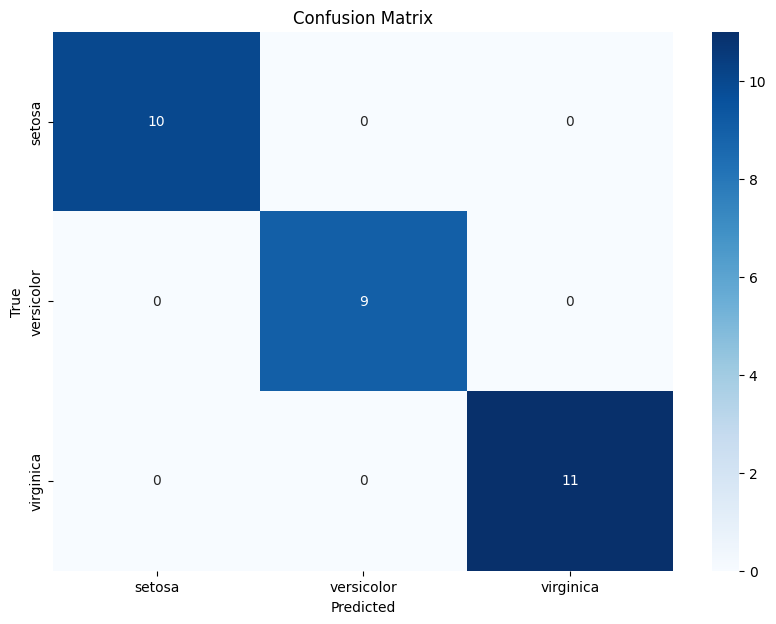

In [ ]:
# Импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Загрузка данных
iris = load_iris()
X = iris.data
y = iris.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели GBM
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Предсказания
y_pred = model.predict(X_test)

# Вычисление метрик
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Вывод метрик
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

# Визуализация
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Пример 2: Задача регрессии
В этом примере мы будем использовать набор данных о домах для задачи регрессии.

Mean Squared Error: 0.29
R^2 Score: 0.78


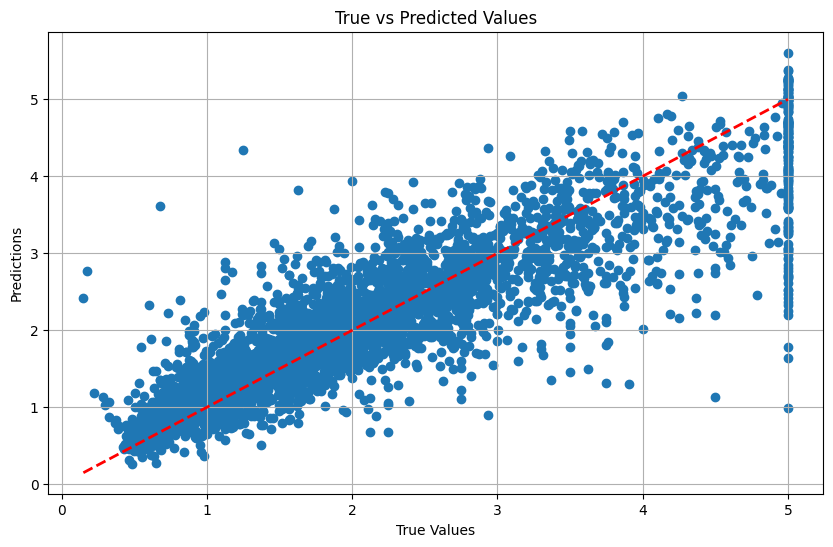

In [ ]:
# Импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Загрузка данных
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели GBM
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Предсказания
y_pred = model.predict(X_test)

# Вычисление метрик
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод метрик
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Визуализация предсказаний
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.grid()
plt.show()

### Вопросы для самопроверки

1. Что такое Gradient Boosting Machine (GBM) и в чем заключается его основной принцип?
   
2. Какие типы задач может решать GBM? Приведите примеры.

3. Что такое слабые модели в контексте GBM? Какие типы слабых моделей чаще всего используются?

4. Что такое бустинг? Каким образом GBM использует метод бустинга для улучшения предсказаний?

5. Какие роли играют градиенты в алгоритме GBM? Как они вычисляются и используются для обучения новых моделей?

6. Какие функции потерь используются в GBM для регрессии и классификации? Приведите примеры их выражений и градиентов.

7. Опишите алгоритм обучения GBM. Как происходит добавление новых моделей на каждом шаге?

8. Что такое скорость обучения (learning rate) в контексте GBM? Как она влияет на процесс обучения и качество модели?

9. Какие методы регуляризации применяются в GBM для предотвращения переобучения? Приведите примеры.

10. Какие метрики используются для оценки качества модели GBM в задачах регрессии и классификации?

11. Что такое ограничение глубины деревьев в контексте GBM? Зачем оно используется?

12. Какие особенности подготовки данных требуются перед применением GBM? Почему важно обрабатывать данные перед обучением?

13. Какие библиотеки в Python часто используются для реализации GBM? Укажите несколько примеров их названий.

14. Какие преимущества и недостатки имеет GBM по сравнению с другими методами машинного обучения?

15. Какие аспекты процесса настройки GBM требуют особого внимания со стороны специалиста по данным?

### Задачи для самостоятельной работы


### Базовые задачи:
1. Обучите GBM для задачи регрессии, используя набор данных (например, Boston Housing). Оцените модель с помощью метрик MSE и MAE.
2. Используя GBM, решите задачу бинарной классификации на наборе данных Breast Cancer. Оцените модель с помощью точности и F1-меры.
3. Обучите GBM на данных для задачи многоклассовой классификации (например, Iris) и оцените результат с помощью метрики кросс-энтропии.
4. Измените скорость обучения (learning rate) в GBM и исследуйте, как это влияет на качество модели.
5. Используя задачу классификации, измените глубину деревьев в модели GBM и оцените влияние этого параметра на переобучение.
6. Обучите GBM с разным числом итераций (n_estimators). Исследуйте, как это влияет на производительность модели.

### Регуляризация и контроль за переобучением:
7. Примените L2-регуляризацию в GBM и сравните результаты с моделью без регуляризации.
8. Используйте раннюю остановку (early stopping) в GBM для предотвращения переобучения. Как это влияет на итоговое качество модели?
9. Включите ограничение глубины деревьев для предотвращения переобучения и проверьте, как это изменяет метрики.
10. Исследуйте влияние параметра min_samples_split на производительность модели GBM в задаче регрессии.
11. Примените случайный выбор признаков на каждом шаге для построения деревьев. Оцените, как это влияет на стабильность и качество модели.
12. Исследуйте влияние параметра максимальной глубины дерева на скорость обучения и качество модели GBM.

### Работа с гиперпараметрами:
13. Постройте модели GBM с различными значениями learning rate и оцените, как выбор этого параметра влияет на сходимость модели.
14. Обучите несколько моделей GBM с разными параметрами min_samples_leaf и проанализируйте влияние этого параметра на точность модели.
15. Измените параметр subsample, ограничивая количество используемых данных для каждого дерева, и проанализируйте, как это влияет на точность и время обучения.
16. Используйте метод GridSearchCV для оптимизации гиперпараметров GBM на задаче регрессии.
17. Исследуйте, как изменяется производительность GBM при изменении параметра n_estimators (количество деревьев).
18. Измените параметр max_features (максимальное количество признаков), используемых при построении деревьев, и оцените влияние на производительность модели.

### Анализ данных:
19. Обработайте пропущенные значения в наборе данных перед обучением модели GBM. Примените различные методы заполнения пропусков и оцените, как это влияет на качество модели.
20. Реализуйте кодирование категориальных переменных с помощью one-hot encoding и обучите GBM. Как кодирование категориальных переменных влияет на результат?
21. Исследуйте, как масштабирование признаков (нормализация или стандартизация) влияет на производительность модели GBM.
22. Проведите feature engineering — добавьте новые признаки в набор данных и оцените влияние этих изменений на модель GBM.
23. Проведите анализ важности признаков с использованием GBM на задаче классификации и визуализируйте результаты.
24. Используйте k-блочную перекрестную проверку для оценки производительности GBM и сравните её с обычной проверкой на валидационном наборе данных.

### Применение GBM:
25. Примените GBM для задачи прогнозирования временных рядов. Как модель справляется с прогнозом на основе временных данных?
26. Используйте GBM для решения задачи классификации с несбалансированными классами. Какие методы помогут улучшить качество предсказаний на данных с редкими событиями?
27. Реализуйте GBM с логистической функцией потерь для задачи бинарной классификации и сравните результаты с линейной логистической регрессией.
28. Сравните результаты работы GBM и Random Forest на одном наборе данных. Оцените производительность обеих моделей по времени обучения и точности.
29. Примените GBM и CatBoost к одной и той же задаче классификации. Сравните результаты по метрикам ROC-AUC и времени работы моделей.
30. Используя GBM, решите задачу классификации на текстовых данных. Преобразуйте текстовые данные в числовые признаки с помощью TF-IDF и обучите модель.


